<a href="https://colab.research.google.com/github/sonohatamashiro/DeepLearning2022Late/blob/main/CNN%2BTrain_example2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN(畳み込みを含むニューラルネットワーク)でモデルに学習させる( = 訓練)

### 学習モデルのライブラリをimport

In [1]:
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense

## keras自身もimport

In [2]:
import keras

## SVG画像表示用のライブラリをimport

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

###その他のライブラリをimport

In [4]:
# 乱数を作るためにNumpyをimport
import numpy as np # importして、npという別名を設定
# 早期終了(earl Stopping)のためのライブラリをimport
import keras.callbacks as callbacks # callbacksという別名を設定

## Numpyで乱数を作り、ダミーデータとして学習用、検証用にする

In [5]:
# 学習用データを x_train として作る
x_train = np.random.random((100,6,6,1))
# 学習用データの正解をy_train として作る
y_train = keras.utils.to_categorical(np.random.randint(10,size=(100,1)),
                                     num_classes=10)

In [6]:
# テスト検証用データをx_testとして作る
# (6,6,1)の形を今度は20セット分
t_test = np.random.random( (20,6,6,1 ) )
# テスト検証用データの正解を y_test として作る
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20,1)),
                                   num_classes=10
                                   )

## 学習モデルを生成する

In [7]:
model = Sequential()

### 学習モデルにニューロンの層を追加してニューラルネットワークにする

### 畳み込み層を追加

In [9]:
model.add( Conv2D( filters=3, # フィルター3パターン
                  kernel_size=(3,3), # 受容野のサイズ縦3,横3
                  kernel_initializer='lecun_uniform',
                  input_shape=(6,6,1), # 入力データの形縦6,横6
                  name='Conv2D_1'
                  ) )

### そのほかの層も追加する

In [10]:
# 全結合層
model.add( Flatten( name='Flatten_1') )
# softmaxで分類するニューロン層
model.add( Dense( units=10,activation='softmax',name='Dense_1'))

## 組み立てた学習モデルの構成を、SVG画像として表示

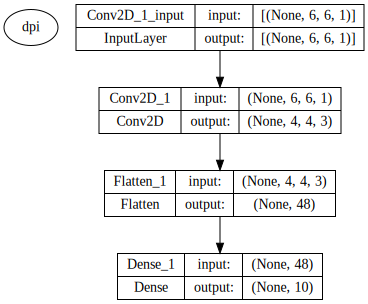

In [11]:
SVG( model_to_dot( model,
                  show_shapes=True, dpi=None
                  ).create( prog='dot', format='svg'))

### 組み立てたモデルを学習データで訓練する

### 早期終了も設定する

In [15]:
# 早期終了用の設定のオブジェクトを用意する
earlyStopping = callbacks.EarlyStopping( monitor='val_loss',#損失を監視
                                        patience=5 ) # epoch5つ分様子を見る

## 学習方法を指定して学習モデルをコンパイルする

In [18]:
model.compile( loss='mean_squared_error',#損失を平均(mean)二乗(squared)誤差(error)
               optimizer='sgd' # パラメータの重みをSDGで最適化する
               # SGD = 確率的匂配降下法
               )

### 学習方法を指定した学習モデルを訓練する

In [19]:
model.fit( x_train, y_train, # 学習データと答えデータ
          batch_size=32, # 32個ずつ「まとめて学習(=バッチ学習)してから重みを調整する
          epochs=10, #バッチが終わったら重みを調整しなおす、その回数
          callbacks=[ earlyStopping ], # エポックの中で呼ぶcallback処理のリストに早期終了を追加
          validation_split=0.2 # 学習データのうち2割を、学習中の自己評価検証に使う
          )

Epoch 1/10
3/3 [==============================] - 1s 197ms/step - loss: 0.1052 - val_loss: 0.1005
Epoch 2/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1052 - val_loss: 0.1004
Epoch 3/10
3/3 [==============================] - 0s 18ms/step - loss: 0.1051 - val_loss: 0.1004
Epoch 4/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1051 - val_loss: 0.1003
Epoch 5/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1050 - val_loss: 0.1002
Epoch 6/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1049 - val_loss: 0.1002
Epoch 7/10
3/3 [==============================] - 0s 24ms/step - loss: 0.1049 - val_loss: 0.1001
Epoch 8/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1048 - val_loss: 0.1000
Epoch 9/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1048 - val_loss: 0.1000
Epoch 10/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1047 - val_loss: 0.0999
